# Ataques Adversariais: Comprometendo Sistemas Baseados em Machine Learning

## Importações

In [1]:
!pip install tensorflow==2.12.1 -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 40.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 41.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 MB 9.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flax 0.10.5 requires jax>=0.5.1, but you have jax 0.4.38 which is incompatible.
google-genai 1.10.0 requires typing

In [1]:
# Import libraries
import numpy as np
from PIL import Image, ImageOps  # Install pillow instead of PIL
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.figsize'] = (8, 8)
mpl.rcParams['axes.grid'] = False

# Import tensorflow and keras libraries
import tensorflow as tf
from keras.models import load_model  # TensorFlow is required for Keras to work

## Funções Úteis

In [2]:
# Preprocess image so that it can be inputted to MobileNetV2
def preprocess(image):
  image = tf.cast(image, tf.float32)
  image = tf.image.resize(image, (224, 224))
  image = tf.keras.applications.mobilenet_v2.preprocess_input(image)
  image = image[None, ...]
  return image

# Load and preprocess image
def loadAndPreprocessImage(image_path):
  image = Image.open(image_path)
  image = image.convert("RGB")
  image = preprocess(image)
  return image

# Print image and its class and score if they exist
def printImage(image, class_name=None, confidence_score=None, eps=None):
  plt.figure()
  plt.imshow(image[0] * 0.5 + 0.5)  # To change [-1, 1] to [0,1]
  if((class_name == None) and (eps != None)):
    plt.title('Epsilon: {:0.3f}'.format(eps))
  elif((class_name != None) and (eps == None)):
    plt.title('Classe: {} Confiança: {}'.format(class_name, confidence_score))
  elif((class_name != None) and (eps != None)):
    plt.title('Epsilon: {:0.3f}\nClasse: {} Confiança: {}'.format(eps, class_name, confidence_score))
  plt.show()

# Classify sample using a pretrained model
def classifySample(image, pretrained_model):
  image_probs = pretrained_model.predict(image)
  index = np.argmax(image_probs)
  class_name = decode_predictions[index]
  confidence_score = image_probs[0][index]
  return image_probs, class_name, confidence_score

## Mostrando as imagens

Ajuste o nome dos arquivos das imagens no código, caso necessário!

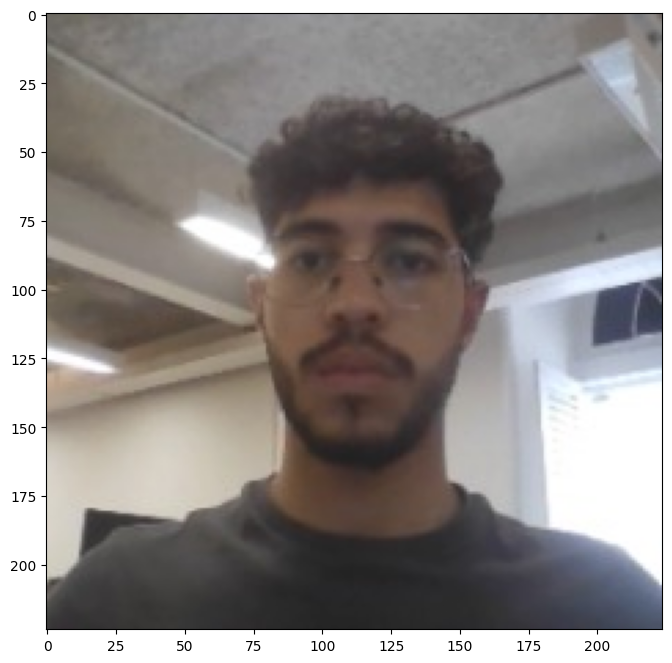

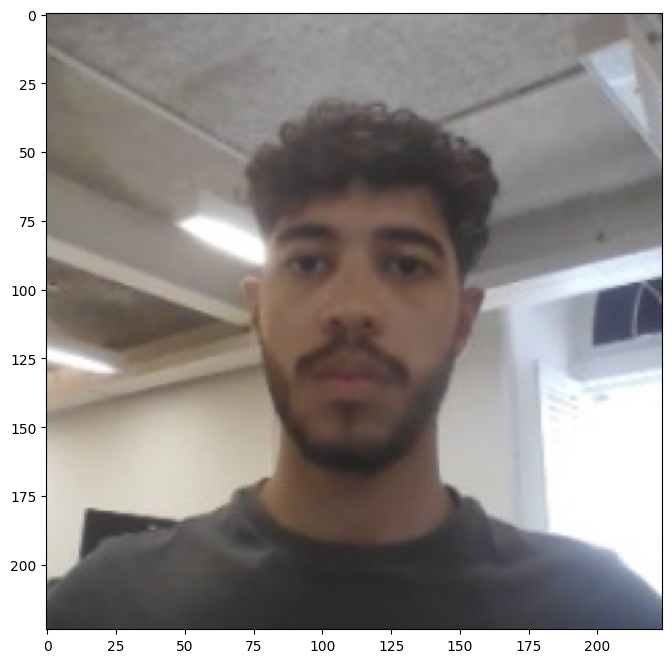

In [3]:
# Load and preprocess sample image
image1 = loadAndPreprocessImage('imagem01.jpg')
image2 = loadAndPreprocessImage('imagem02.jpg')
printImage(image1)
printImage(image2)

## Carregando o modelo

In [4]:
# Load pretrained classifier
pretrained_model = load_model("keras_model.h5", compile=False)
pretrained_model.trainable = False
decode_predictions = open("labels.txt", "r").readlines()

## Realizando a inferência

1/1 [==============================] - 1s 1s/step


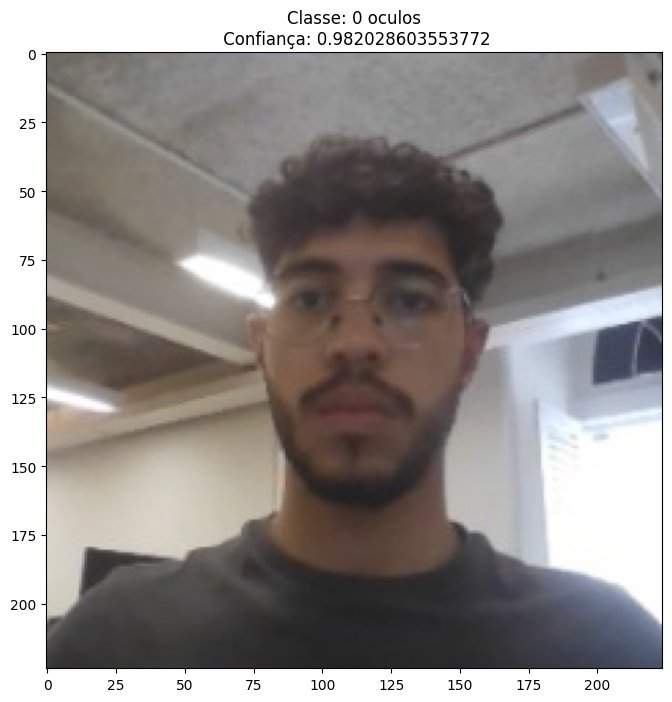

1/1 [==============================] - 0s 56ms/step


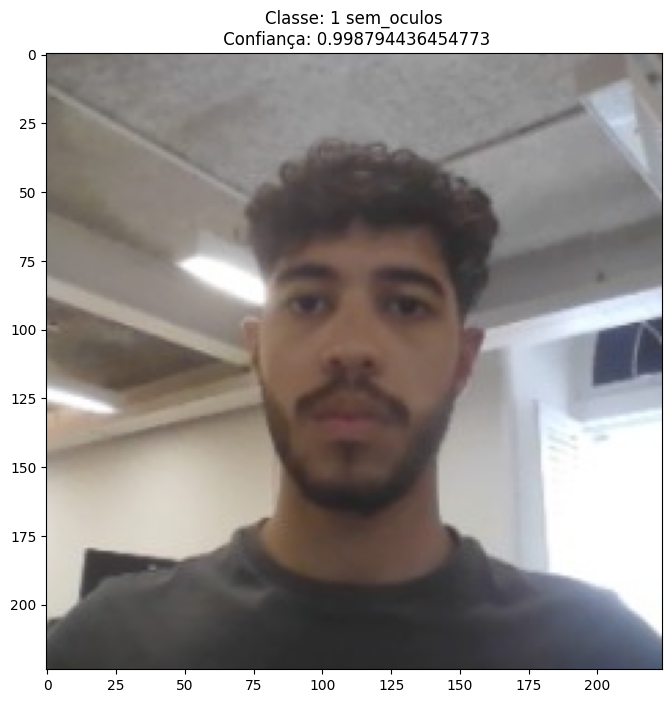

In [5]:
# Classify sample image and print classification result
image_probs, class_name, confidence_score = classifySample(image1, pretrained_model)
# print(image_probs)
printImage(image1, class_name, confidence_score)

image_probs, class_name, confidence_score = classifySample(image2, pretrained_model)
# print(image_probs)
printImage(image2, class_name, confidence_score)

# Ataques Iterativos - WhiteBox
## Bem-vindo ao CleverHans!

https://github.com/cleverhans-lab/cleverhans

## Instalando a biblioteca

In [6]:
! pip install cleverhans -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.3/92.3 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 7.9 MB/s eta 0:00:00


## BIM

### Importando o ataque iterativo

In [7]:
from cleverhans.tf2.attacks.basic_iterative_method import basic_iterative_method

### Gerando o Exemplo Adversarial

In [33]:
# Craft adversarial sample
adversarial_sample = basic_iterative_method(pretrained_model, image1, 0.5, 0.003, 20, np.inf)

### Realizando a classificação do exemplo adversarial


1/1 [==============================] - 0s 43ms/step


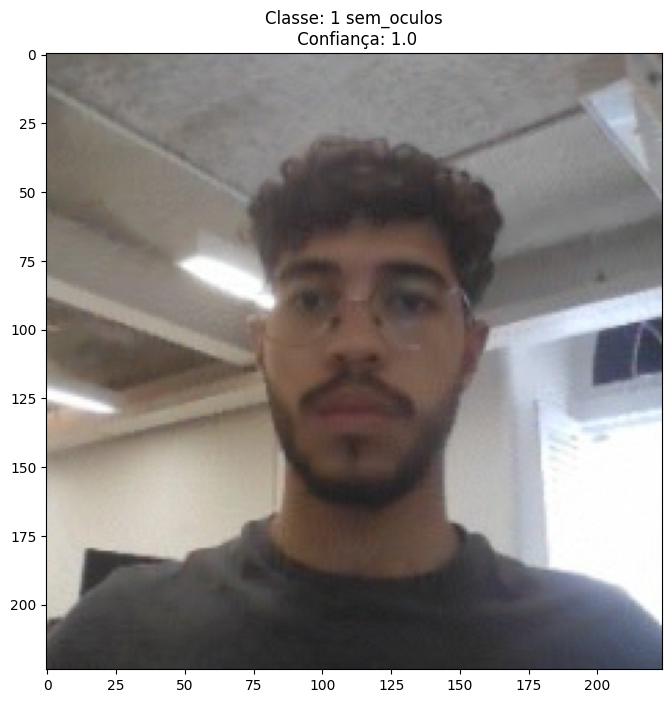

In [34]:
# Classify adversarial sample and print classification result
image_probs, class_name, confidence_score = classifySample(adversarial_sample, pretrained_model)
printImage(adversarial_sample, class_name, confidence_score)

### Exibindo uma aproximação da perturbação

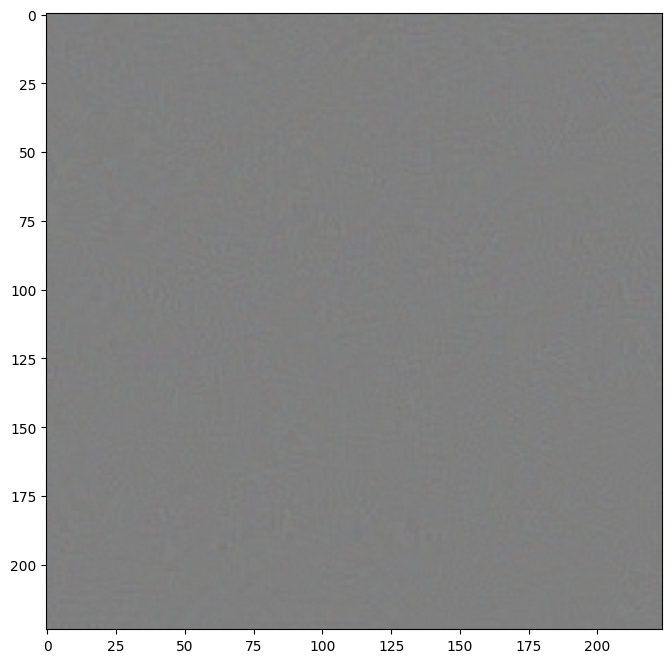

In [36]:
# Get and print adversarial perturbation
adversarial_perturbation = (adversarial_sample - image1) # o clip é dado após somar clean_sample+e*adv_perturbation, não tem como desfazê-lo para obter o adv_perturbation, sendo o adversarial perturbation uma aproximação.
printImage(adversarial_perturbation)

## PGD


### Importando o ataque iterativo

In [37]:
from cleverhans.tf2.attacks.projected_gradient_descent import projected_gradient_descent

### Gerando o Exemplo Adversarial

In [38]:
# Craft adversarial sample
adversarial_sample = projected_gradient_descent(pretrained_model, image1, 0.5, 0.003, 20, np.inf)

### Realizando a classificação do exemplo adversarial


1/1 [==============================] - 0s 43ms/step


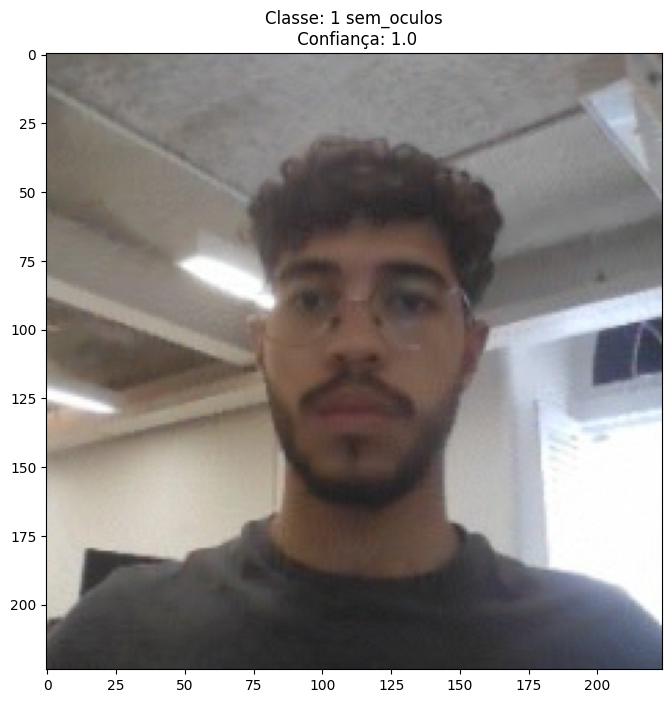

In [39]:
# Classify adversarial sample and print classification result
image_probs, class_name, confidence_score = classifySample(adversarial_sample, pretrained_model)
printImage(adversarial_sample, class_name, confidence_score)

### Exibindo uma aproximação da perturbação

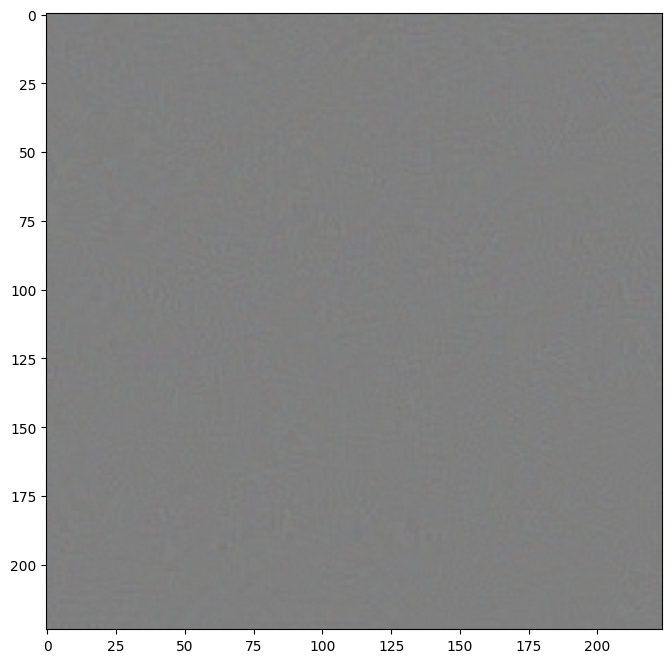

In [40]:
# Get and print adversarial perturbation
adversarial_perturbation = (adversarial_sample - image1) # o clip é dado após somar clean_sample+e*adv_perturbation, não tem como desfazê-lo para obter o adv_perturbation
printImage(adversarial_perturbation)

## MIM

### Importando o ataque iterativo

In [41]:
from cleverhans.tf2.attacks.momentum_iterative_method import momentum_iterative_method

### Gerando o Exemplo Adversarial

In [59]:
# Craft adversarial sample
adversarial_sample = momentum_iterative_method(pretrained_model, image1, 0.5, 0.0012, 20, np.inf)

### Realizando a classificação do exemplo adversarial


1/1 [==============================] - 0s 52ms/step


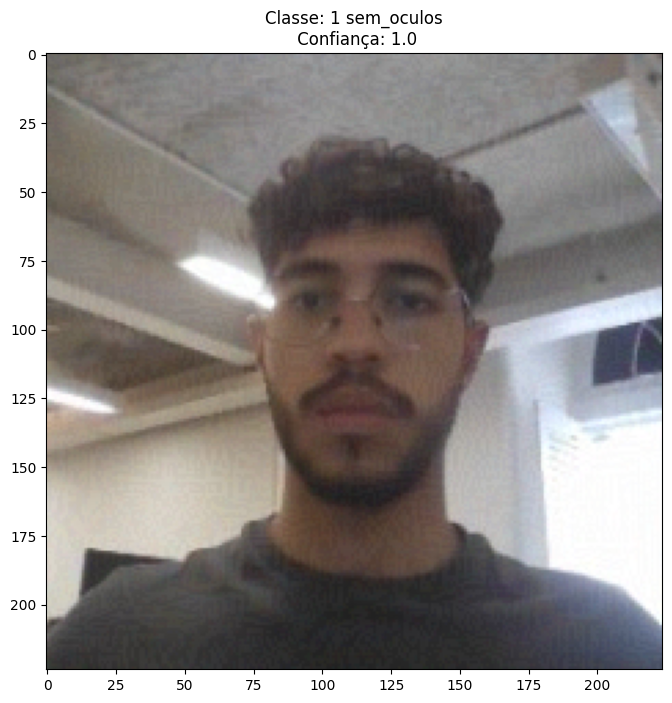

In [60]:
# Classify adversarial sample and print classification result
image_probs, class_name, confidence_score = classifySample(adversarial_sample, pretrained_model)
printImage(adversarial_sample, class_name, confidence_score)

### Exibindo uma aproximação da perturbação

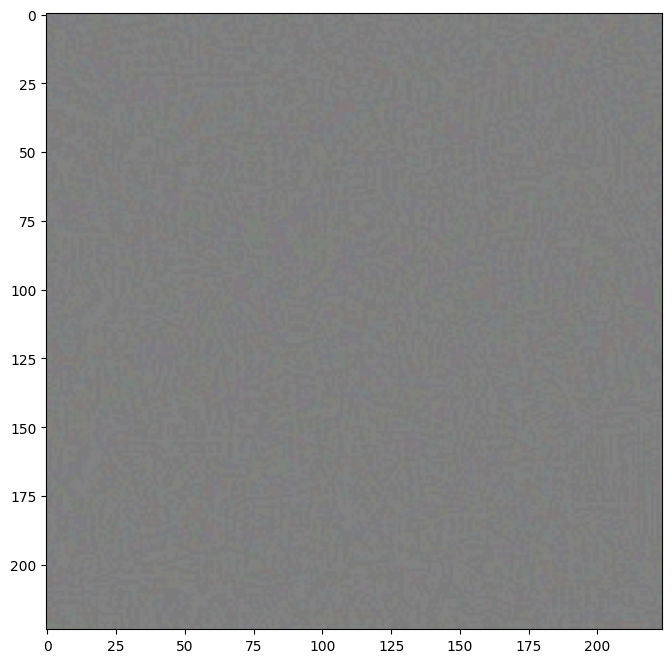

In [61]:
# Get and print adversarial perturbation
adversarial_perturbation = (adversarial_sample - image1) # o clip é dado após somar clean_sample+e*adv_perturbation, não tem como desfazê-lo para obter o adv_perturbation
printImage(adversarial_perturbation)